# K-Means Clustering: Country Analysis

### Geographic Clustering of Countries using K-Means

This section clusters countries based on their latitude and longitude, helping visualize geographic groupings.

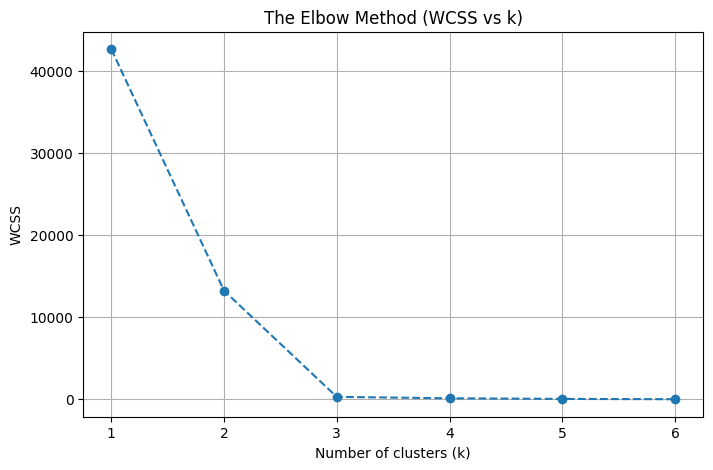

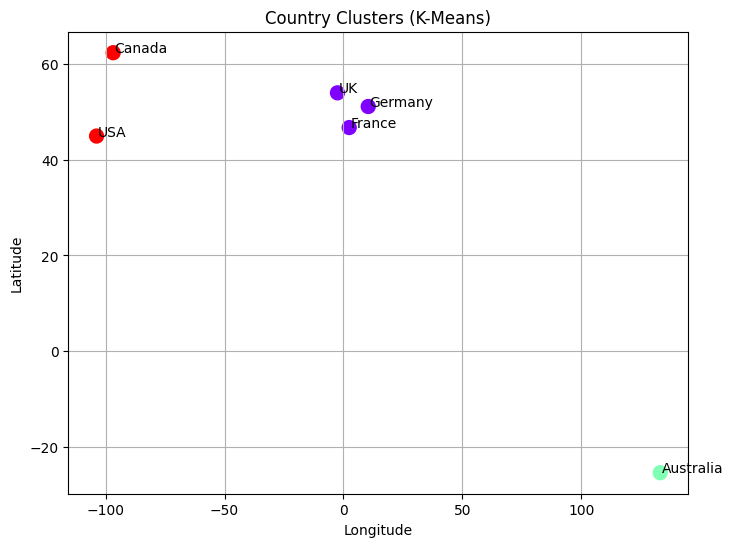

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('../datasets/country-clusters.csv')

# View the data
df.head()

# Prepare data — let's use Latitude and Longitude for geographic clustering
X = df[['Latitude', 'Longitude']]

# Store WCSS values for each k
wcss = []

# Try different values of k (cannot have more clusters than samples)
for i in range(1, len(X) + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # .inertia_ is the WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (WCSS vs k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Fit final KMeans model with chosen k
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='rainbow', s=100)

# Annotate countries
for i, row in df.iterrows():
    plt.text(row['Longitude'] + 0.5, row['Latitude'], row['Country'])

plt.title("Country Clusters (K-Means)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


### Clustering Countries by Language

Here, we cluster countries based on their primary language, using label encoding and the K-Means algorithm.

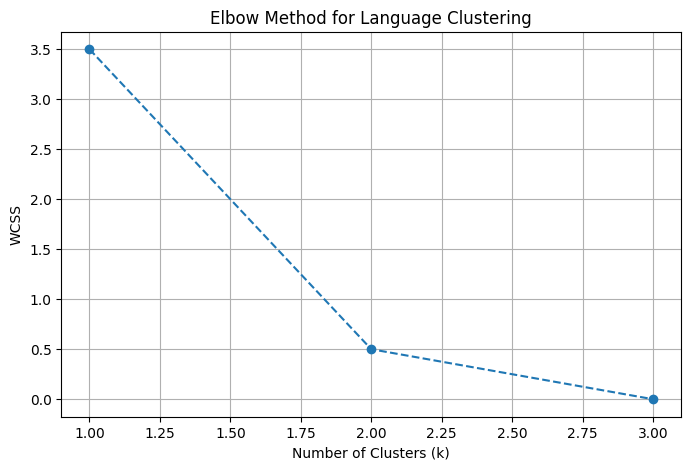

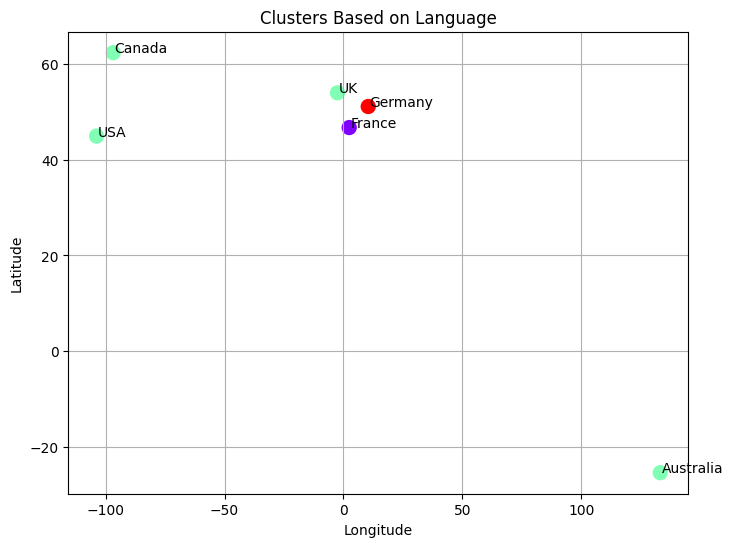

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your CSV data
df = pd.read_csv("../datasets/country-clusters.csv")

# Encode the Language column into numbers
le = LabelEncoder()
df['Language_Code'] = le.fit_transform(df['Language'])

X_lang = df[['Language_Code']]  

# Only try k up to the number of unique languages
max_k = len(df['Language_Code'].unique())

wcss = []
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_lang)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
# Elbow plot helps identify the best number of clusters by showing how WCSS 
# (Within-Cluster Sum of Squares) changes as k increases.
plt.figure(figsize=(8,5))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Language Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with best k (e.g., 3 from the elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Language_Cluster'] = kmeans.fit_predict(X_lang)

plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Language_Cluster'], cmap='rainbow', s=100)
for i, row in df.iterrows():
    plt.text(row['Longitude'] + 0.5, row['Latitude'], row['Country'])
plt.title("Clusters Based on Language")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Customer Segmentation Using Cluster Analysis

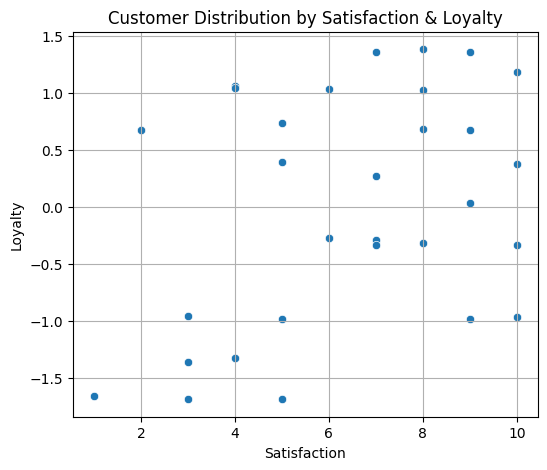

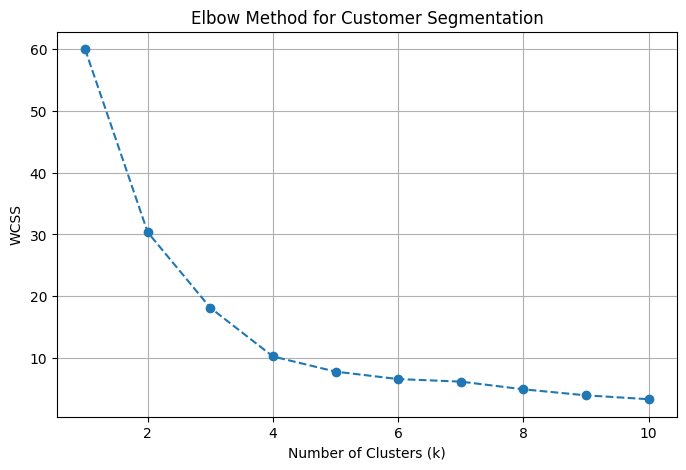

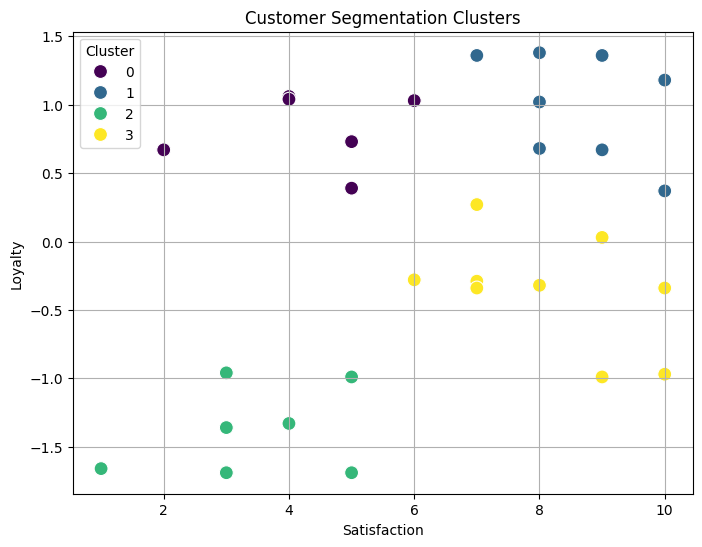

In [ ]:
# Load dataset
df = pd.read_csv('../datasets/customer-segmentation.csv')

df.head()

# Plot the data to get an initial idea
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Satisfaction', y='Loyalty', data=df)
plt.title("Customer Distribution by Satisfaction & Loyalty")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.grid(True)
plt.show()

# Standardize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['Satisfaction', 'Loyalty']]
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Customer Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Fit KMeans with the optimal number of clusters 
optimal_k = 4  # Replace with the optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)    

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction', y='Loyalty', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Customer Segmentation Clusters")     
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()